# Ultimate Challenge - Part 3
## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'ultimate_data_challenge.json'
data = pd.read_json(path, orient='records', precise_float=True)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There aren't many NaN's for `avg_rating_by_driver` or `phone`, so we'll just drop those.

There is a 20% discrepancy for `avg_rating_of_driver`, so we'll need to handle those differently.

Looking at the `data.describe()` block above, using the mean value as a substitute seems to be a good idea.

In [5]:
mean_value = round(data['avg_rating_of_driver'].mean(), 1)
data['avg_rating_of_driver'] = data['avg_rating_of_driver'].fillna(value=mean_value)
data = data.dropna()
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,4.6,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [6]:
eda = data.copy()
eda['last_trip_month'] = eda['last_trip_date'].apply(lambda x: int(str(x).split('-')[1]))
eda['last_trip_day'] = eda['last_trip_date'].apply(lambda x: int(str(x).split('-')[2]))
eda.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month,last_trip_day
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,6,17
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,5,5
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,7
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,6,29
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,3,15


In [7]:
eda['last_trip_month'].max()

7

In [8]:
july = eda.loc[eda['last_trip_month'] == 7]
july['last_trip_day'].value_counts()

1    545
Name: last_trip_day, dtype: int64

### Data pulled in July...
So that means we are only interested in data from June, according to the specifics of the instructions.

In [9]:
df = eda.loc[eda['last_trip_month'] == 6]
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month,last_trip_day
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,6,17
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,6,29
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,6,6
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,6,8
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,6,28


In [10]:
df = df.drop(columns=['last_trip_month', 'last_trip_day'])

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,18090.0,3.252018,4.901247,0.0,0.00,2.00,4.00,125.00
avg_rating_of_driver,18090.0,4.592327,0.519898,1.0,4.40,4.70,5.00,5.00
avg_surge,18090.0,1.073516,0.163411,1.0,1.00,1.00,1.09,4.50
surge_pct,18090.0,9.112709,15.573861,0.0,0.00,0.00,13.30,100.00
weekday_pct,18090.0,61.083361,29.678005,0.0,43.80,63.60,84.60,100.00
avg_dist,18090.0,5.135278,4.510037,0.0,2.57,3.74,5.92,79.34
avg_rating_by_driver,18090.0,4.762808,0.330565,1.0,4.70,4.80,5.00,5.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18090 entries, 0 to 49995
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18090 non-null  object 
 1   trips_in_first_30_days  18090 non-null  int64  
 2   signup_date             18090 non-null  object 
 3   avg_rating_of_driver    18090 non-null  float64
 4   avg_surge               18090 non-null  float64
 5   last_trip_date          18090 non-null  object 
 6   phone                   18090 non-null  object 
 7   surge_pct               18090 non-null  float64
 8   ultimate_black_user     18090 non-null  bool   
 9   weekday_pct             18090 non-null  float64
 10  avg_dist                18090 non-null  float64
 11  avg_rating_by_driver    18090 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


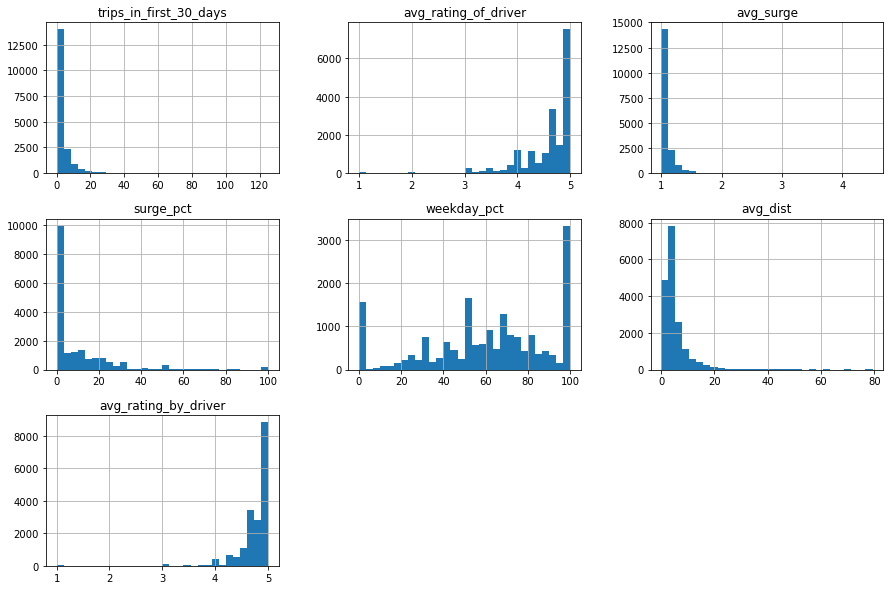

In [13]:
df.hist(bins=30, figsize=(15, 10));

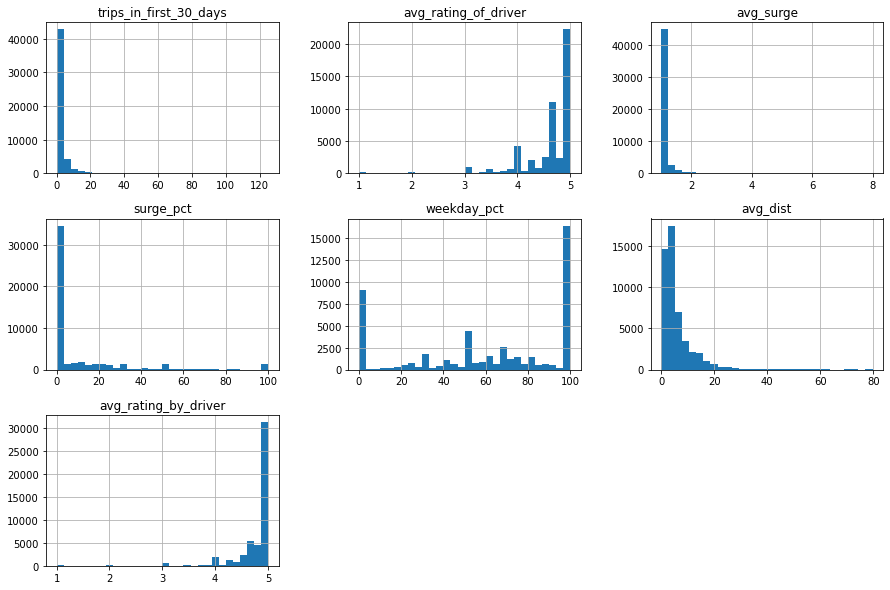

In [14]:
data.hist(bins=30, figsize=(15, 10));

In [15]:
df['ultimate_black_user'].value_counts()

True     9122
False    8968
Name: ultimate_black_user, dtype: int64

In [16]:
df['phone'].value_counts()

iPhone     15039
Android     3051
Name: phone, dtype: int64

In [17]:
df.loc[df['phone'] == 'iPhone', 'ultimate_black_user'].value_counts()

True     7717
False    7322
Name: ultimate_black_user, dtype: int64

Of the 50k users that signed up, only 18k remained as of June, which equates to a ~36% retention rate.

The other things that stand out:
- they seem to use the ride share through out the week more so than the rest of the drivers,
- they seem to rate their drivers higher (more 5 star reviews vs 4 & 5 star reviews),
- there's a fairly even split between ultimate black users and non,
- and iPhone users are much more likely to use the service after 6 months

## Predictive modeling
### Pre-processing

In [18]:
df_pred = data.copy()
df_pred

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,4.6,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [19]:
df_pred['last_trip_month'] = df_pred['last_trip_date'].apply(lambda x: int(str(x).split('-')[1]))
# create a target variable
df_pred['active_user'] = np.where(df_pred['last_trip_month'] > 5, 1, 0)
df_pred

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,6,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,5,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,6,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,6,1
49996,Astapor,1,2014-01-24,4.6,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,1,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,5,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,1,0


In [20]:
# drop columns model won't use
cols_to_drop = ['signup_date', 'last_trip_date', 'last_trip_month']
df_pred = df_pred.drop(columns=cols_to_drop)
df_pred.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [21]:
from sklearn.preprocessing import StandardScaler
import sys

sc_list = []
for col in df_pred.columns:
    if col != "active_user":
        try:
            sc = StandardScaler()
            df_pred[col] = sc.fit_transform(np.array(df_pred[col]).reshape(-1,1))
            sc_list.append([col, sc])
        except:
            print("error: ", sys.exc_info())
            continue

error:  (<class 'ValueError'>, ValueError('could not convert string to float: "King\'s Landing"'), <traceback object at 0x00000232E0642500>)
error:  (<class 'ValueError'>, ValueError("could not convert string to float: 'iPhone'"), <traceback object at 0x00000232E064FFC0>)


In [22]:
sc_list

[['trips_in_first_30_days', StandardScaler()],
 ['avg_rating_of_driver', StandardScaler()],
 ['avg_surge', StandardScaler()],
 ['surge_pct', StandardScaler()],
 ['ultimate_black_user', StandardScaler()],
 ['weekday_pct', StandardScaler()],
 ['avg_dist', StandardScaler()],
 ['avg_rating_by_driver', StandardScaler()]]

In [23]:
df_pred.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,0.451637,0.174659,0.114853,iPhone,0.329473,1.288114,-0.397411,-0.375668,0.496834,1
1,Astapor,-0.601237,0.706309,-0.337622,Android,-0.444787,-0.776329,-0.294772,0.440002,0.496834,0
2,Astapor,0.188418,-0.534207,-0.337622,iPhone,-0.444787,-0.776329,1.055747,-0.891016,0.496834,0
3,King's Landing,1.767729,-0.002557,0.295844,iPhone,0.560746,1.288114,0.515540,-0.608463,0.273175,1
4,Winterfell,3.083822,-0.356991,0.522081,Android,0.148477,-0.776329,0.580365,-0.471629,0.273175,0


In [24]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 4])], remainder='passthrough')
# df_pred_cols = df_pred.columns
# df_pred = np.array(ct.fit_transform(df_pred))
# df_pred = pd.DataFrame(df_pred, columns=df_pred_cols)
df_pred = pd.get_dummies(df_pred)
df_pred.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0.451637,0.174659,0.114853,0.329473,1.288114,-0.397411,-0.375668,0.496834,1,0,1,0,0,1
1,-0.601237,0.706309,-0.337622,-0.444787,-0.776329,-0.294772,0.440002,0.496834,0,1,0,0,1,0
2,0.188418,-0.534207,-0.337622,-0.444787,-0.776329,1.055747,-0.891016,0.496834,0,1,0,0,0,1
3,1.767729,-0.002557,0.295844,0.560746,1.288114,0.515540,-0.608463,0.273175,1,0,1,0,0,1
4,3.083822,-0.356991,0.522081,0.148477,-0.776329,0.580365,-0.471629,0.273175,0,0,0,1,1,0


In [25]:
import statsmodels.api as sm

# Backeards elimination 
X = df_pred.drop('active_user', axis=1)
y = df_pred['active_user']
columns = list(X.columns)
set1 = set(columns)
p_max = 1
while (len(columns)>0):
    p_values = []
    X_test = X[columns]
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y,X_test).fit()
    p = pd.Series(model.pvalues.values[1:],index = columns)      
    p_max = max(p)
    p_max_index = p.idxmax()
    if(p_max >0.05):
        columns.remove(p_max_index)
    else:
        break
selected_features_BE = columns
set2 = set(selected_features_BE)
# print the differences
print(len(set1), len(selected_features_BE), set1.difference(set2))

13 11 {'weekday_pct', 'phone_Android'}


In [26]:
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px

# Model-determined feature importance
model = RandomForestClassifier(criterion='entropy')
model.fit(X,y)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})

In [27]:
feature_importance.sort_values('importance', inplace=True, ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
fig = px.bar(feature_importance, x='feature', y='importance')
fig.show()

## Findings...

### Backwards Elimination
According to our first go around with feature selection, there are only 2 variables that have little to no impact on user outcomes: android phones and weekday_pct.

### Random Forest 
The random forest test cut down a few more variables, but also added back weekday_pct. Everything to the right of avg_surge on the bar chart falls below our p-value of 0.05.

### Overlap
Both models agree that avg_dist, ratings by and for drivers, # of trips in first 30 days, and surge usage are important factors though.

So we'll create 3 datasets and see which has the most accurate prediction.

### Model Selection & Training

In [28]:
overlap = ['avg_dist', 'trips_in_first_30_days', 
           'avg_rating_of_driver', 'avg_rating_by_driver',
           'avg_surge', 'surge_pct'
           ]

In [29]:
df_be = X[selected_features_BE]
df_fi = X[list(feature_importance.feature[:6])]
df_ov = X[overlap]

In [30]:
df_be.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_iPhone
0,0.451637,0.174659,0.114853,0.329473,1.288114,-0.375668,0.496834,0,1,0,1
1,-0.601237,0.706309,-0.337622,-0.444787,-0.776329,0.440002,0.496834,1,0,0,0
2,0.188418,-0.534207,-0.337622,-0.444787,-0.776329,-0.891016,0.496834,1,0,0,1
3,1.767729,-0.002557,0.295844,0.560746,1.288114,-0.608463,0.273175,0,1,0,1
4,3.083822,-0.356991,0.522081,0.148477,-0.776329,-0.471629,0.273175,0,0,1,0


In [31]:
df_fi.head()

,avg_dist,weekday_pct,avg_rating_by_driver,avg_rating_of_driver,trips_in_first_30_days,surge_pct
0,-0.375668,-0.397411,0.496834,0.174659,0.451637,0.329473
1,0.440002,-0.294772,0.496834,0.706309,-0.601237,-0.444787
2,-0.891016,1.055747,0.496834,-0.534207,0.188418,-0.444787
3,-0.608463,0.515540,0.273175,-0.002557,1.767729,0.560746
4,-0.471629,0.580365,0.273175,-0.356991,3.083822,0.148477


In [32]:
df_ov.head()

,avg_dist,trips_in_first_30_days,avg_rating_of_driver,avg_rating_by_driver,avg_surge,surge_pct
0,-0.375668,0.451637,0.174659,0.496834,0.114853,0.329473
1,0.440002,-0.601237,0.706309,0.496834,-0.337622,-0.444787
2,-0.891016,0.188418,-0.534207,0.496834,-0.337622,-0.444787
3,-0.608463,1.767729,-0.002557,0.273175,0.295844,0.560746
4,-0.471629,3.083822,-0.356991,0.273175,0.522081,0.148477


In [33]:
# DF_be
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_be, y, test_size = 0.2, random_state = 1)

In [34]:
model1 = RandomForestClassifier(criterion='entropy')
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

0.7412467111920664

In [36]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = model1, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.97 %
Standard Deviation: 0.15 %


In [37]:
# DF_fi
X_train, X_test, y_train, y_test = train_test_split(df_fi, y, test_size = 0.2, random_state = 1)

In [38]:
model2 = RandomForestClassifier(criterion='entropy')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred2)

0.7082574377656344

In [40]:
accuracies = cross_val_score(estimator = model2, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.34 %
Standard Deviation: 0.45 %


In [41]:
# DF_ov
X_train, X_test, y_train, y_test = train_test_split(df_ov, y, test_size = 0.2, random_state = 1)

In [42]:
model3 = RandomForestClassifier(criterion='entropy')
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred3)

0.7000607164541591

In [44]:
accuracies = cross_val_score(estimator = model3, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.26 %
Standard Deviation: 0.43 %


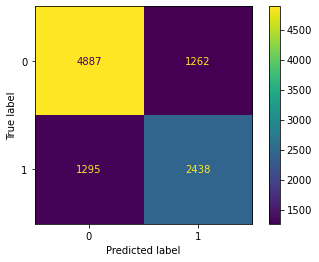

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()

plt.show()

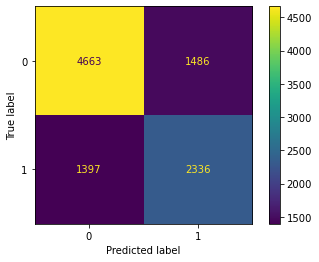

In [46]:
cm = confusion_matrix(y_test, y_pred2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)
disp.plot()

plt.show()

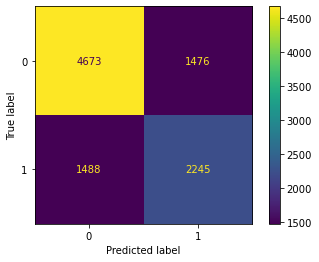

In [47]:
cm = confusion_matrix(y_test, y_pred3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model3.classes_)
disp.plot()

plt.show()

In [48]:
# And finally, should we even perform feature selection at all?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
model4 = RandomForestClassifier(criterion='entropy')
model4.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [49]:
y_pred4 = model4.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7588544828981988

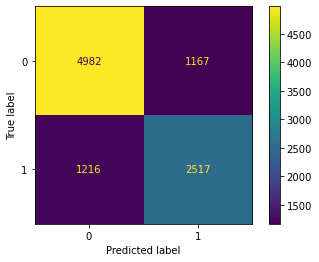

In [50]:
cm = confusion_matrix(y_test, y_pred4, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model4.classes_)
disp.plot()

plt.show()

In [51]:
accuracies = cross_val_score(estimator = model4, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.56 %
Standard Deviation: 0.42 %


## Summary

It seems that initially, all of the features are useful in predicting churn, at least if using a Random Forest Model. That model was chosen for speed, as boosting models generally require more time and computational power but also for it's strengths as an ensemble model.

Cross validation reflects that as well. That being said, Model 1, where we used backwards elimination (to determine weekday_pct and android phones were small contributors) had very similar results after cross validation, compared to using all of features. So that leads us to the following...

## Recommendations for retaining riders

1. Promote weekend usage - because weekday usage had low impact, but surges had a higher impact, marketing efforts should encourage use during surge times.
2. Android phones - this part is two-fold: 1) Android users could reflect a market opportunity because they reflect such a small portion of the user base or 2) they could be ignored because it's possible they are just less likely to use the service.

In [52]:
eda['phone'] = eda['phone'].apply(lambda x: 1 if x == 'iPhone' else 0)

In [53]:
eda['ultimate_black_user'] = eda['ultimate_black_user'].apply(lambda x: 1 if x == True else 0)

In [54]:
eda.loc[(eda.phone == 1)&(eda.last_trip_month==6)].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month,last_trip_day
count,15039.000000,15039.000000,15039.000000,15039.0,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.0,15039.000000
mean,3.319370,4.581342,1.075726,1.0,9.299262,0.513133,61.219616,5.134789,4.761174,6.0,20.321431
std,4.975115,0.527162,0.165317,0.0,15.580497,0.499844,29.361631,4.533407,0.331299,0.0,8.450611
min,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,6.0,1.000000
25%,0.000000,4.400000,1.000000,1.0,0.000000,0.000000,44.200000,2.540000,4.700000,6.0,14.000000
50%,2.000000,4.700000,1.000000,1.0,0.000000,1.000000,63.600000,3.720000,4.800000,6.0,22.000000
75%,4.000000,5.000000,1.100000,1.0,13.700000,1.000000,84.200000,5.910000,5.000000,6.0,28.000000
max,125.000000,5.000000,4.500000,1.0,100.000000,1.000000,100.000000,79.340000,5.000000,6.0,30.000000


In [55]:
eda.loc[(eda.phone == 0)&(eda.last_trip_month==6)].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month,last_trip_day
count,3051.000000,3051.000000,3051.000000,3051.0,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.0,3051.000000
mean,2.920026,4.646477,1.062622,0.0,8.193150,0.460505,60.411734,5.137686,4.770862,6.0,18.965257
std,4.505606,0.478909,0.153229,0.0,15.510899,0.498519,31.186934,4.393752,0.326853,0.0,9.187667
min,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,6.0,1.000000
25%,0.000000,4.500000,1.000000,0.0,0.000000,0.000000,41.200000,2.680000,4.700000,6.0,12.000000
50%,1.000000,4.800000,1.000000,0.0,0.000000,0.000000,64.700000,3.840000,4.900000,6.0,21.000000
75%,4.000000,5.000000,1.070000,0.0,11.100000,1.000000,86.000000,5.960000,5.000000,6.0,27.000000
max,47.000000,5.000000,4.250000,0.0,100.000000,1.000000,100.000000,70.480000,5.000000,6.0,30.000000


Just some *back of napkin math* to test an idea that came up while writing the summary. The idea is to see if different phone users had an impact on any of the features. It seems that `trips_in_first_30_days`, `surge_pct`, and `ultimate_black_user` are all higher in the iPhone category. These were recognized as important features in all of the models. So perhaps marketing efforts should double down on iPhone users. 